In [1]:
import numpy as np
import pandas as pd
import os

### Read the file

In [2]:
directory_path = os.getcwd()
folder_name = os.path.basename(directory_path)
directory_path = os.getcwd()
raw_df = pd.read_feather(os.path.join(directory_path, 'chars60_raw_imputed.feather'))

In [3]:
raw_df.columns

Index(['gvkey', 'permno', 'sic', 'ret', 'exchcd', 'shrcd', 'adm', 'bm_ia',
       'herf', 'hire', 'me_ia', 'baspread', 'beta', 'ill', 'maxret', 'mom12m',
       'mom1m', 'mom36m', 'mom60m', 'mom6m', 're', 'rvar_capm', 'rvar_ff3',
       'rvar_mean', 'seas1a', 'std_dolvol', 'std_turn', 'zerotrade', 'me',
       'dy', 'turn', 'dolvol', 'abr', 'sue', 'cinvest', 'nincr', 'pscore',
       'acc', 'bm', 'agr', 'alm', 'ato', 'cash', 'cashdebt', 'cfp', 'chcsho',
       'chpm', 'chtx', 'depr', 'ep', 'gma', 'grltnoa', 'lev', 'lgr', 'ni',
       'noa', 'op', 'pctacc', 'pm', 'rd_sale', 'rdm', 'rna', 'roa', 'roe',
       'rsup', 'sgr', 'sp', 'date', 'ffi49'],
      dtype='object')

In [4]:
#Check missing value
raw_tf = raw_df.isnull().any()
raw_tf.where(raw_tf == True).dropna().index.to_list()
# There're too much missing value before 1972, so we focus on the data after 1972.
raw_df['year'] = raw_df['date'].dt.year
raw_df = raw_df[raw_df['year'] >= 1972]
raw_df = raw_df.drop(['year'], axis=1)
raw_tf = raw_df.isnull().any()
raw_tf.where(raw_tf == True).dropna().index.to_list()

[]

In [5]:
raw_df

,gvkey,permno,sic,ret,exchcd,shrcd,adm,bm_ia,herf,hire,...,rd_sale,rdm,rna,roa,roe,rsup,sgr,sp,date,ffi49
136,1010,10006,3743,0.004854,1.0,10.0,0.000006,0.000046,0.718884,-0.049123,...,0.007357,0.000009,0.106823,-0.000011,0.096217,0.000047,0.042217,0.001158,1972-01-31,25
137,1010,10006,3743,-0.007729,1.0,10.0,0.000006,0.000042,0.718884,-0.049123,...,0.007357,0.000008,0.106823,-0.000011,0.096217,0.000047,0.042217,0.001152,1972-02-29,25
138,1010,10006,3743,-0.068966,1.0,10.0,0.000006,0.000059,0.718884,-0.049123,...,0.007357,0.000009,0.106823,-0.000011,0.096217,0.000048,0.042217,0.001175,1972-03-31,25
139,1010,10006,3743,-0.068783,1.0,10.0,0.000007,0.000122,0.718884,-0.049123,...,0.007357,0.000009,0.106823,-0.000011,0.096217,0.000051,0.042217,0.001262,1972-04-30,25
140,1010,10006,3743,0.025000,1.0,10.0,0.000006,0.000164,0.718079,-0.099815,...,0.006949,0.000009,0.090818,0.000007,0.080707,-0.000004,-0.003038,0.001351,1972-05-31,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551140,260778,90272,6324,-0.057476,1.0,11.0,0.000005,-0.000689,0.092306,0.348315,...,0.000000,0.000000,0.053990,0.015538,0.043113,0.000146,0.272945,0.001559,2019-08-31,46
551141,260778,90272,6324,-0.042735,1.0,11.0,0.000006,-0.000671,0.092306,0.348315,...,0.000000,0.000000,0.053990,0.015538,0.043113,0.000155,0.272945,0.001654,2019-09-30,46
551142,260778,90272,6324,0.144423,1.0,11.0,0.000006,-0.000657,0.092306,0.348315,...,0.000000,0.000000,0.053990,0.015538,0.043113,0.000162,0.272945,0.001728,2019-10-31,46
551143,260778,90272,6324,0.085873,1.0,11.0,0.000006,-0.000699,0.092306,0.348315,...,0.000000,0.000000,0.067523,0.018249,0.054882,0.000159,0.380853,0.001668,2019-11-30,46


In [6]:
# add macro file
macro_df = pd.read_csv(os.path.join(directory_path, 'Macro.csv'))
macro_df = macro_df[macro_df['yyyymm']>=197201]

In [7]:
# merge them together
raw_df['yyyymm'] = raw_df['date'].dt.strftime("%Y%m").apply(int)
total_df = pd.merge(raw_df,macro_df,how='inner',on='yyyymm')
total_df.drop(columns='yyyymm',inplace=True)

In [8]:
total_df

,gvkey,permno,sic,ret,exchcd,shrcd,adm,bm_ia,herf,hire,...,date,ffi49,b/m,tbl,ntis,svar,d/p,e/p,dfy,tms
0,1010,10006,3743,0.004854,1.0,10.0,0.000006,0.000046,0.718884,-0.049123,...,1972-01-31,25,0.635357,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268
1,1040,15763,3949,0.111399,1.0,10.0,0.000037,-0.000224,0.163326,0.033872,...,1972-01-31,6,0.635357,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268
2,1043,18980,5040,0.080000,1.0,11.0,0.000037,0.000088,1.000000,-0.092000,...,1972-01-31,42,0.635357,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268
3,1045,21020,4512,0.042945,1.0,11.0,0.000031,-0.000685,0.062520,-0.033342,...,1972-01-31,41,0.635357,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268
4,1070,21549,3714,0.191489,2.0,10.0,0.000037,0.001247,0.248527,0.000000,...,1972-01-31,23,0.635357,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462751,188255,12981,2430,0.048165,1.0,11.0,0.000025,0.000052,0.262476,0.000000,...,2013-12-31,17,0.304408,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371
462752,189491,13035,3561,0.001157,1.0,11.0,0.000003,-0.000044,0.157914,0.016000,...,2013-12-31,21,0.304408,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371
462753,199356,13168,7370,-0.062160,3.0,11.0,0.000015,-0.000239,0.267858,0.260000,...,2013-12-31,36,0.304408,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371
462754,260774,90199,6500,0.084983,1.0,11.0,0.000005,-0.000063,0.476217,0.088235,...,2013-12-31,47,0.304408,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371


### pre-Process the Data

In [9]:
len(total_df['ffi49'].value_counts())

48

In [10]:
len(total_df['sic'].value_counts())
# 'sic' and 'ffi49' are all industry information, so they might hvae something in common.
#  Here we choose to drop 'sic', since there're too much types.

303

In [11]:
# set date as Index
total_df.set_index('date', inplace=True)

In [12]:
# also, gvkey and permno are codes for each stock. Here we want to focus on the importance of each characteristic.
# So we drop them.
y_total = total_df['ret']
total_df = total_df.drop(columns={'sic','permno','gvkey','ret'})

In [13]:
y_total

date
1972-01-31    0.004854
1972-01-31    0.111399
1972-01-31    0.080000
1972-01-31    0.042945
1972-01-31    0.191489
                ...   
2013-12-31    0.048165
2013-12-31    0.001157
2013-12-31   -0.062160
2013-12-31    0.084983
2013-12-31   -0.052221
Name: ret, Length: 462756, dtype: float64

#### transform the dummy variables and normalization

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# we use onehotencoder to encode the dummy variables
def onehot(columns):
    ohe = OneHotEncoder()
    trans = ohe.fit_transform(total_df[[columns]])
    
    return trans.toarray()

In [16]:
d_ffi49 = onehot('ffi49')
d_exchcd = onehot('exchcd')
d_shrcd = onehot('shrcd')
total_df = total_df.drop(columns={'ffi49','exchcd','shrcd'})
features = total_df.columns.tolist()

In [17]:
# then we merge them together
total_df['ffi49'] = d_ffi49.tolist()
total_df['exchcd'] = d_exchcd.tolist()
total_df['shrcd'] = d_shrcd.tolist()
total_df

,adm,bm_ia,herf,hire,me_ia,baspread,beta,ill,maxret,mom12m,...,tbl,ntis,svar,d/p,e/p,dfy,tms,ffi49,exchcd,shrcd
date,,,,,,,,,,,,,,,,,,,,,
1972-01-31,0.000006,0.000046,0.718884,-0.049123,1.259719e+05,0.009656,0.794048,1.240770,0.049180,0.121682,...,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0]"
1972-01-31,0.000037,-0.000224,0.163326,0.033872,5.186702e+05,0.015009,1.409503,13.821094,0.041420,0.438430,...,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0]"
1972-01-31,0.000037,0.000088,1.000000,-0.092000,-4.160822e+04,0.030370,2.205532,12.353322,0.083700,0.253863,...,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 1.0]"
1972-01-31,0.000031,-0.000685,0.062520,-0.033342,5.607096e+05,0.022826,1.588084,22.634887,0.049296,0.750638,...,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 1.0]"
1972-01-31,0.000037,0.001247,0.248527,0.000000,-2.731388e+06,0.042447,0.720158,3.520096,0.116279,0.516129,...,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0]","[1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,0.000025,0.000052,0.262476,0.000000,1.976499e+06,0.013114,1.669907,494.065086,0.058240,0.443785,...,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 1.0]"
2013-12-31,0.000003,-0.000044,0.157914,0.016000,-7.224876e+06,0.011212,1.065726,1062.994422,0.124438,0.344219,...,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 1.0]"
2013-12-31,0.000015,-0.000239,0.267858,0.260000,-9.982225e+07,0.015552,1.345975,479.958631,0.058048,1.165881,...,0.0007,0.012144,0.000746,1.722817,1.265919,0.0076,0.0371,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0]","[0.0, 1.0]"


## Split the Data(还没有rolling）and Random Forest
### Total 49 years: 32 years for training, 6 years for validation and 6 years for testing.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#这里比较繁琐，是试验用的，后面写函数简化
train_x = total_df['1972-01-01':'1988-12-31']
train_y = y_total['1972-01-01':'1988-12-31']
val_x = total_df['1989-01-01':'1995-12-31']
val_y = y_total['1989-01-01':'1995-12-31']
test_y = y_total['1996-01-01':'2001-12-31']
test_x = total_df['1996-01-01':'2001-12-31']

train_ffi49 = train_x['ffi49']
val_ffi49 = val_x['ffi49']
test_ffi49 = test_x['ffi49']
train_exchcd = train_x['exchcd']
val_exchcd = val_x['exchcd']
test_exchcd = test_x['exchcd']
train_shrcd = train_x['shrcd']
val_shrcd = val_x['shrcd']
test_shrcd = test_x['shrcd']

# Standarlize
scaler = StandardScaler()
normtrain_x = scaler.fit_transform(train_x[features])
normval_x = scaler.transform(val_x[features])
normtest_x = scaler.transform(test_x[features])

normtrain_x_df = pd.DataFrame(normtrain_x, index = train_x.index, columns=features)
normval_x_df = pd.DataFrame(normval_x, index = val_x.index, columns=features)
normtest_x_df = pd.DataFrame(normtest_x, index = test_x.index, columns=features)

# get the dataframe
normtrain_x_df['ffi49'] = train_ffi49
normtrain_x_df['exchcd'] = train_exchcd
normtrain_x_df['shrcd'] = train_shrcd

normval_x_df['ffi49'] = val_ffi49
normval_x_df['exchcd'] = val_exchcd
normval_x_df['shrcd'] = val_shrcd

normtest_x_df['ffi49'] = test_ffi49
normtest_x_df['exchcd'] = test_exchcd
normtest_x_df['shrcd'] = test_shrcd

# get the array
normtrain_x = np.concatenate((normtrain_x,np.array(train_ffi49.tolist()),np.array(train_exchcd.tolist()),np.array(train_shrcd.tolist())),axis=1)
normval_x = np.concatenate((normval_x,np.array(val_ffi49.tolist()),np.array(val_exchcd.tolist()),np.array(val_shrcd.tolist())),axis=1)
normtest_x = np.concatenate((normtest_x,np.array(test_ffi49.tolist()),np.array(test_exchcd.tolist()),np.array(test_shrcd.tolist())),axis=1)



/Users/liuxuyang/opt/anaconda3/envs/mytensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.
/Users/liuxuyang/opt/anaconda3/envs/mytensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  
/Users/liuxuyang/opt/anaconda3/envs/mytensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/liuxuyang/opt/anaconda3/envs/mytensorflow/lib/python3.7/site-packages/ip

In [22]:
# Now we start training in random forest.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, PredefinedSplit
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, f1_score, classification_report
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

In [23]:
# not used
def RFReg(X_train, y_train, X_valid, y_valid):

    rf_best = RandomForestRegressor().fit(X_train, y_train)
    for L in range(1,10): # find the best n_estimators
        for B in range(1,10): # find the best max_depth
            rf_temp = RandomForestRegressor(n_estimators=10, max_depth=None).fit(X_train, y_train)
            if rf_temp.score(X_valid, y_valid)> rf_best.score(X_valid, y_valid): # keep the best ones
                L_best = L
                B_best = B
                rf_best = RandomForestRegressor(n_estimators=B_best, max_depth=L_best).fit(X_train, y_train) 
    return rf_best

In [161]:
# R_square_oos 有两个，没区别
def r2_oos(ret, pred):
    sum_of_sq_res = np.nansum(np.power((ret-pred), 2))
    sum_of_sq_total = np.nansum(np.power(ret, 2))
    
    return 1-sum_of_sq_res/sum_of_sq_total

def calculate_oos(test_y,prediction_y):
    denominator = (test_y ** 2).sum()
    numerator = ((test_y-prediction_y)**2 ).sum()
    roos = 1 - numerator / denominator
    return roos

r2oos_score = make_scorer(r2_oos, greater_is_better=True) 


def find_best_cv(X_train, y_train, X_valid, y_valid):
    
    param_grid = { 
    'n_estimators': [30,50,100,150,200,250,300,350,400],
    'max_depth' : [2,3,4,5,6]}
    scoring_dict = {'r2_oos':r2oos_score, 'mse':'neg_mean_squared_error'}

    # The indices which have zero or positive values, will be kept in val
    len_X_train = len(X_train)
    len_X_val = len(X_valid)
    val_fold = np.repeat([-1, 0], [len_X_train, len_X_val])
    ps = PredefinedSplit(val_fold)

    X_train_n_val = np.concatenate((X_train, X_valid))
    y_train_n_val = np.concatenate((y_train, y_valid))
    
    grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=ps, 
                        n_jobs=8, verbose=2, scoring= scoring_dict, refit='r2_oos')
    
    grid.fit(X_train_n_val, y_train_n_val)
    return grid
    

In [162]:
grid = find_best_cv(normtrain_x, train_y, normval_x, val_y)

Fitting 1 folds for each of 45 candidates, totalling 45 fits
[CV] END .......................max_depth=2, n_estimators=30; total time= 1.2min
[CV] END ......................max_depth=2, n_estimators=400; total time=14.8min
[CV] END ......................max_depth=4, n_estimators=150; total time=11.1min
[CV] END .......................max_depth=5, n_estimators=30; total time= 2.8min
[CV] END ......................max_depth=5, n_estimators=100; total time= 9.2min
[CV] END ......................max_depth=5, n_estimators=350; total time=79.9min
[CV] END ......................max_depth=2, n_estimators=300; total time=11.2min
[CV] END ......................max_depth=3, n_estimators=400; total time=22.5min
[CV] END ......................max_depth=5, n_estimators=200; total time=18.4min
[CV] END ......................max_depth=6, n_estimators=150; total time=33.0min
[CV] END ......................max_depth=2, n_estimators=200; total time= 7.5min
[CV] END ......................max_depth=3, n_es

In [163]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [164]:
rf = RandomForestRegressor(n_estimators=200, max_depth=3).fit(normtrain_x, train_y)

In [165]:
rf.score(normval_x,val_y)

-0.023803817273788663

In [166]:
prediction_y=rf.predict(normtrain_x)
r2 = calculate_oos(train_y,prediction_y)
r2

0.102628314132306

In [167]:
def convert_df_to_array(df):
#因为list作为dataframe的一个元素存在，直接training会有报错，得先做些转化，也就是之前那段试验的内容
    features = df.columns
    #print(features)
    df2 = pd.DataFrame(index=df.index)

    for feature in features:
        if type(df[feature][0]) != list :
            #print(df)
            df2[feature] = df[feature]
        else:
            df2 = np.concatenate((df2,np.array(df[feature].tolist())),axis=1)

    return df2



def R_square_reduction(x_train_df,x_train,y_train,model):
#改进了wangche的，适配我这个形式
    features = x_train_df.columns
    
    original_rsquared = calculate_oos(y_train,model.predict(x_train))
    
    # 建立一个dataframe, 记录每一个变量变成0后的R-squared值
    rsquared_df = pd.DataFrame(columns=["R-squared", "R-squared Reduction"], index=features)
    
    # loop
    for feature in features:
        new_x_train = x_train_df.copy(deep=True)
        if type(new_x_train[feature][0]) == list :
            new_x_train[feature] = np.zeros([len(new_x_train[feature]),len(new_x_train[feature][0])]).tolist()
        else:
            
            new_x_train[feature] = 0
        new_x_train = convert_df_to_array(new_x_train)
        new_pred = (model.predict(new_x_train))
        
        new_rsquared = r2_oos(y_train, new_pred)
        rsquared_df.loc[feature, "R-squared"] = new_rsquared
        #print(rsquared_df)
    
    rsquared_df["R-squared Reduction"] = np.abs(original_rsquared - np.array(rsquared_df["R-squared"]).flatten())
    rsquared_df["R-squared Normalized"] = rsquared_df["R-squared Reduction"] / rsquared_df["R-squared Reduction"].sum()
    rsquared_df = rsquared_df.sort_values(by="R-squared Normalized")
    
    return rsquared_df    
    
    
    

In [168]:
R_df = R_square_reduction(normtrain_x_df,normtrain_x,train_y,rf)
R_df

,R-squared,R-squared Reduction,R-squared Normalized
shrcd,0.102628,0.0,0.0
gma,0.102628,0.0,0.0
chtx,0.102628,0.0,0.0
chpm,0.102628,0.0,0.0
chcsho,0.102628,0.0,0.0
...,...,...,...
e/p,0.097038,0.005591,0.049897
b/m,0.088022,0.014606,0.13036
tbl,0.08209,0.020539,0.183307
svar,0.0705,0.032128,0.286742


In [171]:
prediction_y=rf.predict(normtest_x)
r2 = calculate_oos(test_y,prediction_y)
r2

0.0007099446165667045

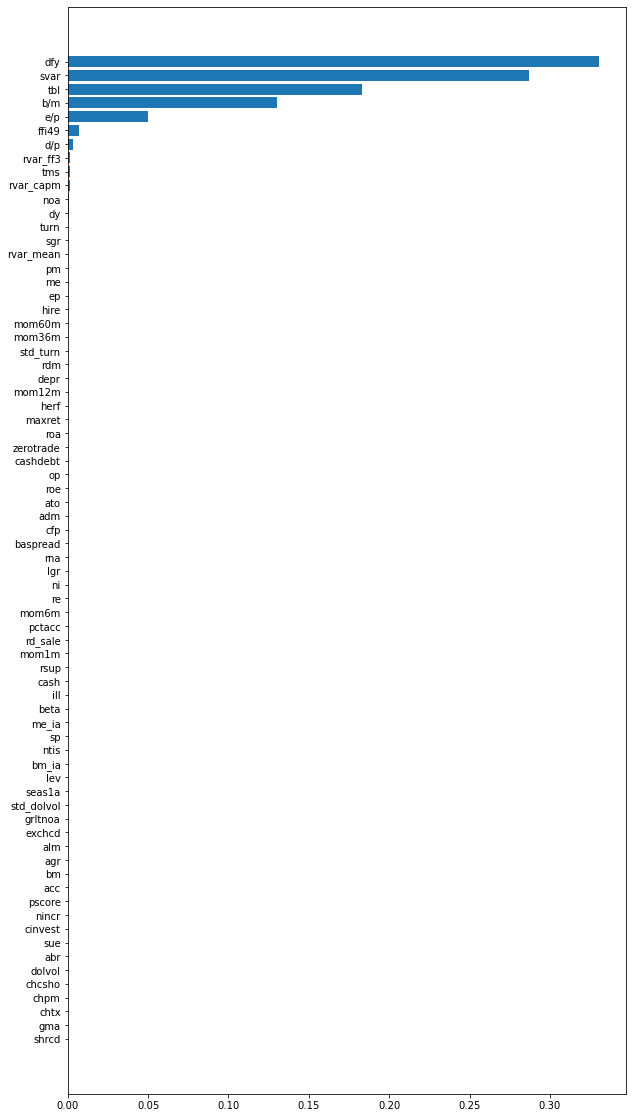

In [170]:
plt.figure(figsize=(10, 20))
plt.barh(R_df.index, R_df["R-squared Normalized"])
plt.show()

In [169]:
R_df.loc['ffi49']

R-squared                0.10181
R-squared Reduction     0.000819
R-squared Normalized    0.007307
Name: ffi49, dtype: object

#### 下面是草稿，没用

In [245]:
rf2 = RandomForestRegressor(n_estimators=10, max_depth=5).fit(normtrain_x, train_y)

In [246]:
rf2.score(normval_x,val_y)

-0.07517625560231656

In [248]:
rf3 = RandomForestRegressor(n_estimators=100, max_depth=2).fit(normtrain_x, train_y)
rf3.score(normval_x,val_y)
# 他这个score是一般的R2，不是out of sample R2

-0.03961656791298496

In [256]:
rf4 = RandomForestRegressor(n_estimators=300, max_depth=5).fit(normtrain_x, train_y)
rf4.score(normval_x,val_y)
rf4.score(normtrain_x, train_y)

-0.07333211104093529

In [257]:
rf4.score(normtrain_x, train_y)

0.1571841163579063

In [260]:
rf5 = RandomForestRegressor(n_estimators=300, max_depth=15).fit(normtrain_x, train_y)
print(rf5.score(normval_x,val_y))
print(rf5.score(normtrain_x, train_y))

-0.14525348170886732
0.48534684554820584


In [261]:
rf5 = RandomForestRegressor(n_estimators=300, max_depth=10).fit(normtrain_x, train_y)
print(rf5.score(normval_x,val_y))
print(rf5.score(normtrain_x, train_y))

-0.10153070286255139
0.3121668745743542


In [262]:
rf5 = RandomForestRegressor(n_estimators=350, max_depth=10).fit(normtrain_x, train_y)
print(rf5.score(normval_x,val_y))
print(rf5.score(normtrain_x, train_y))

-0.10060809434956619
0.31266193627461547


In [ ]:
rf5 = RandomForestRegressor(n_estimators=350, max_depth=5).fit(normtrain_x, train_y)
print(rf5.score(normval_x,val_y))
print(rf5.score(normtrain_x, train_y))

In [259]:
rf5.score(normval_x,val_y)

-0.09913698721093733

In [253]:
pre_y=rf3.predict(normval_x)
r22 = calculate_oos(val_y,pre_y)
r22

-0.014844882524612801

In [254]:
prediction_y=rf.predict(normval_x)
r2 = calculate_oos(val_y,prediction_y)

In [255]:
r2

-0.2183133882912116